In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazonreviews/amazonreviews.tsv


# amazon reviews analysis by VADER

In [2]:
import pandas as pd
import numpy as np
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
df=pd.read_csv('/kaggle/input/amazonreviews/amazonreviews.tsv',sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


# see if the data are balance or not

In [5]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

# preprocessing the data

In [6]:
df.isna().sum()

label     0
review    0
dtype: int64

# see if we have empty space values

In [7]:
blanks=[]
for i,lb,rv in df.itertuples():
    #(index,label,review)
    if type(rv)==str:
        if rv.isspace():
            blanks.append[i]
blanks            

[]

there is no space values
if we have we drop them by(df.drop(blanks,inplace=True)

# check the polarity score

In [8]:
df.iloc[0]['review']

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [9]:
sid.polarity_scores(df.iloc[0]['review'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

as we see the compound score is positive

# add scores label to the data

In [10]:
df['scores']=df['review'].apply(lambda review:sid.polarity_scores(review))

In [11]:
df.head()

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


# add compound score column

In [12]:
df['compound']=df['scores'].apply(lambda d:d['compound'])

In [13]:
df.head()

,label,review,scores,compound
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


In [14]:
df.tail()

,label,review,scores,compound
9995,pos,A revelation of life in small town America in ...,"{'neg': 0.017, 'neu': 0.846, 'pos': 0.136, 'co...",0.9610
9996,pos,Great biography of a very interesting journali...,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp...",0.9544
9997,neg,Interesting Subject; Poor Presentation: You'd ...,"{'neg': 0.096, 'neu': 0.768, 'pos': 0.137, 'co...",0.7074
9998,neg,Don't buy: The box looked used and it is obvio...,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...",-0.3595
9999,pos,Beautiful Pen and Fast Delivery.: The pen was ...,"{'neg': 0.028, 'neu': 0.811, 'pos': 0.161, 'co...",0.9107


In [15]:
sid.polarity_scores(df.iloc[9997]['review'])

{'neg': 0.096, 'neu': 0.768, 'pos': 0.137, 'compound': 0.7074}

In [16]:
df.iloc[9997]['review']

"Interesting Subject; Poor Presentation: You'd be hard-pressed to tell a boring story about about a plucky country newspaper editor who had principles and stuck to 'em. But this author has done it. He says the book is an adaptation of his doctoral thesis. That fits. The book reads like a well-done, fully footnoted college paper, not like a dramatic novel. It strives to identify key historical facts at the expense of the reader's interest. With a modest amount of effort, it could have been reworked as a compelling autobiographical novel bolstered by its remarkable display of features of midwestern life during the first half of the 20th Century."

# add polarity column we make it by VADER

In [17]:
df['comp_score']=df['compound'].apply(lambda score: 'pos' if score>=0 else 'neg')

In [18]:
df.head()

,label,review,scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


# comparing accuracy between data label and VADER score

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [20]:
accuracy_score(df['label'],df['comp_score'])

0.7007

In [21]:
print(classification_report(df['label'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.85      0.50      0.63      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.70     10000
   macro avg       0.74      0.70      0.69     10000
weighted avg       0.75      0.70      0.69     10000



In [22]:
print(confusion_matrix(df['label'],df['comp_score']))

[[2540 2557]
 [ 436 4467]]


              precision    recall  f1-score   support

         neg       0.85      0.50      0.63      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.70     10000
   macro avg       0.74      0.70      0.69     10000
weighted avg       0.75      0.70      0.69     10000



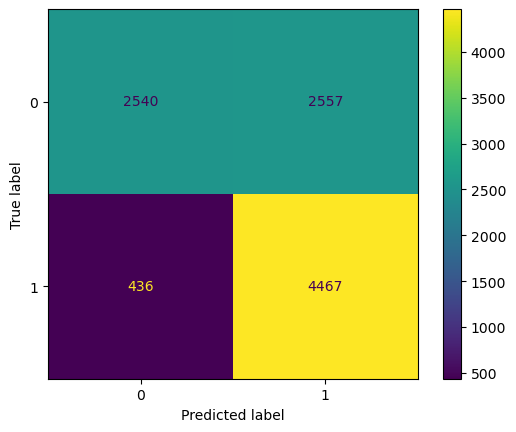

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(df['label'],df['comp_score']))
disp=disp.plot()
print(classification_report(df['label'],df['comp_score']))

# as we see the VADER has aproblem with negative reviews but overall accuracy is acceptable